In [112]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("historico_regiao_nordeste.csv")
df

In [152]:
df

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Log_Total
2,72,106,162,99,142,318,531,2036,5055,10018,3640,2023,24202,2000,4.383851
3,121,116,7,43,292,342,1317,4485,12226,14927,8736,2413,45025,2001,4.653454
4,270,630,306,253,350,523,2901,8169,16617,18400,15334,8249,72002,2002,4.857345
5,2326,516,571,739,563,1470,4056,4667,22278,20040,16441,9669,83336,2003,4.920833
6,963,306,377,371,737,1402,2661,5113,17932,16286,19339,13306,78793,2004,4.896488
7,2445,578,442,331,313,1109,3093,5492,15823,23891,14851,8569,76937,2005,4.886135
8,1593,691,499,176,298,870,2296,5105,9145,9959,12720,8203,51555,2006,4.712271
9,2058,285,417,403,889,2774,5804,19547,27403,23376,13910,7243,104109,2007,5.017488
10,1407,672,355,323,372,1010,2354,3418,10459,16631,15153,8842,60996,2008,4.785301
11,1923,402,512,135,87,496,1856,3493,8801,7653,11908,6852,44118,2009,4.644616


## Tratamento do dataframe

In [114]:
df.drop([0 ,1,23,24,25,26], axis=0,inplace=True)

In [115]:
df["Ano"]= df["Unnamed: 0"]
df.drop("Unnamed: 0", axis=1,inplace=True)
#df.set_index("Ano") 


In [ ]:
df.dtypes

In [117]:
df.Janeiro = df.Janeiro.astype("int64")
df.Fevereiro = df.Fevereiro.astype("int64")
df.Março = df.Março.astype("int64")
df.Abril = df.Abril.astype("int64")
df.Maio = df.Maio.astype("int64")
df.Novembro = df.Novembro.astype("int64")
df.Dezembro = df.Dezembro.astype("int64")
df.Ano = df.Ano.astype("int64")

In [ ]:
df.dtypes

##Analise Estatistica dos dados

In [119]:
df.describe()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1151.476190,438.142857,417.285714,317.000000,468.380952,1257.523810,3008.761905,6963.952381,13848.380952,13530.000000,9828.190476,5864.142857,57093.238095,2010.000000
std,678.492124,213.408127,190.178112,179.174775,256.231043,615.204325,1400.857448,4424.160084,6056.795155,5068.924866,4749.649773,2897.229975,20357.051628,6.204837
min,72.000000,106.000000,7.000000,43.000000,87.000000,318.000000,531.000000,2036.000000,5055.000000,5988.000000,3640.000000,2023.000000,24202.000000,2000.000000
25%,671.000000,285.000000,328.000000,236.000000,350.000000,1010.000000,2296.000000,4485.000000,9468.000000,10018.000000,5638.000000,3672.000000,44118.000000,2005.000000
50%,963.000000,402.000000,389.000000,321.000000,391.000000,1281.000000,2737.000000,5492.000000,12226.000000,12132.000000,8497.000000,4924.000000,51555.000000,2010.000000
75%,1513.000000,618.000000,512.000000,376.000000,504.000000,1415.000000,3423.000000,8169.000000,17932.000000,16286.000000,13910.000000,8203.000000,72833.000000,2015.000000
max,2445.000000,759.000000,849.000000,788.000000,1188.000000,2774.000000,6419.000000,19547.000000,27403.000000,23891.000000,19339.000000,13306.000000,104109.000000,2020.000000


In [151]:
df.max()

Janeiro        2445.000000
Fevereiro       759.000000
Março           849.000000
Abril           788.000000
Maio           1188.000000
Junho          2774.000000
Julho          6419.000000
Agosto        19547.000000
Setembro      27403.000000
Outubro       23891.000000
Novembro      19339.000000
Dezembro      13306.000000
Total        104109.000000
Ano            2020.000000
Log_Total         5.017488
dtype: float64

In [159]:
df.min()

Janeiro         72.000000
Fevereiro      106.000000
Março            7.000000
Abril           43.000000
Maio            87.000000
Junho          318.000000
Julho          531.000000
Agosto        2036.000000
Setembro      5055.000000
Outubro       5988.000000
Novembro      3640.000000
Dezembro      2023.000000
Total        24202.000000
Ano           2000.000000
Log_Total        4.383851
dtype: float64

In [160]:
df[df.Março == 7]["Ano"]

3    2001
Name: Ano, dtype: int64

In [158]:
df[df.Total == 104109]["Ano"]

9    2007
Name: Ano, dtype: int64

In [155]:
df[df.Setembro == 27403]["Ano"]

9    2007
Name: Ano, dtype: int64

In [156]:
df[df.Fevereiro == 759]["Ano"]

18    2016
Name: Ano, dtype: int64

##Gáfico do crescimento histórico em cada mês

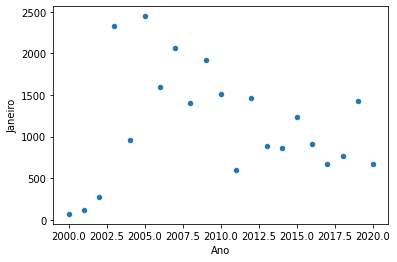

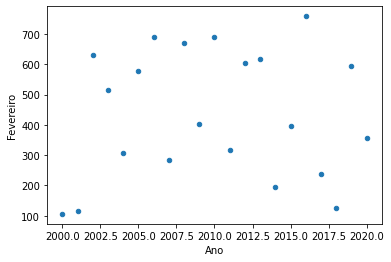

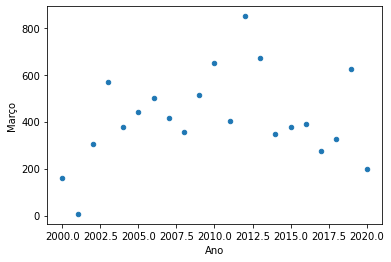

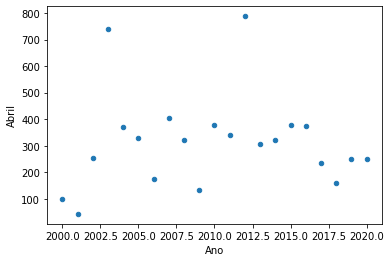

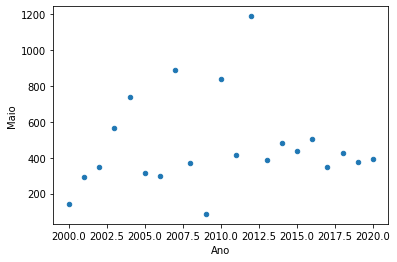

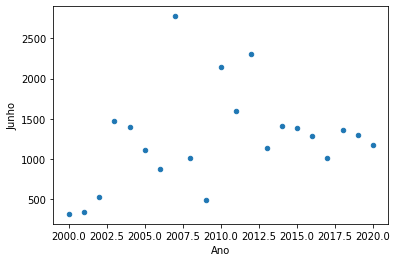

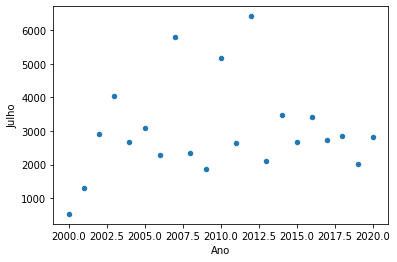

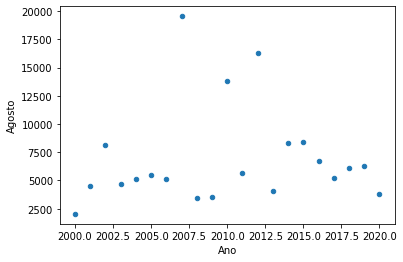

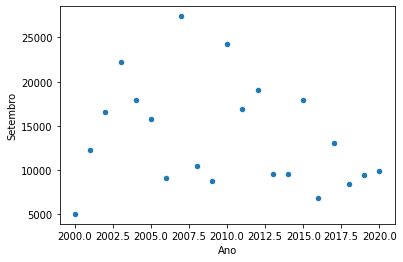

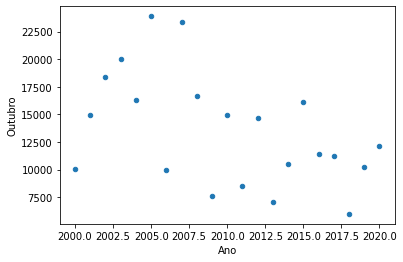

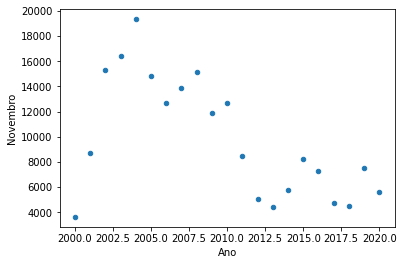

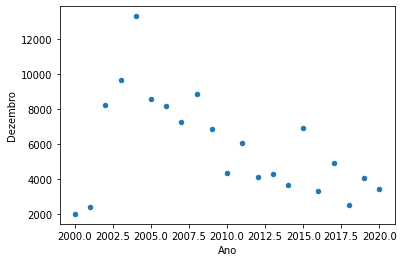

In [120]:
df.plot.scatter(x='Ano',y="Janeiro")
df.plot.scatter(x='Ano',y="Fevereiro")
df.plot.scatter(x='Ano',y="Março")
df.plot.scatter(x='Ano',y="Abril")
df.plot.scatter(x='Ano',y="Maio")
df.plot.scatter(x='Ano',y="Junho")
df.plot.scatter(x='Ano',y="Julho")
df.plot.scatter(x='Ano',y="Agosto")
df.plot.scatter(x='Ano',y="Setembro")
df.plot.scatter(x='Ano',y="Outubro")
df.plot.scatter(x='Ano',y="Novembro")
df.plot.scatter(x='Ano',y="Dezembro")

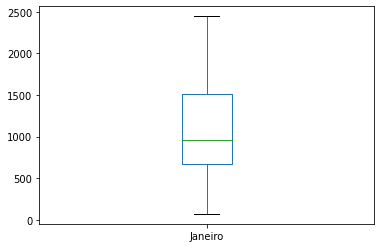

In [121]:
df["Janeiro"].plot.box()

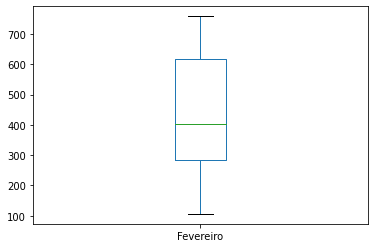

In [122]:
df["Fevereiro"].plot.box()

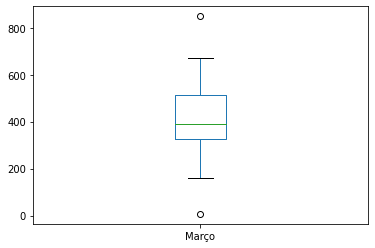

In [123]:
df["Março"].plot.box()

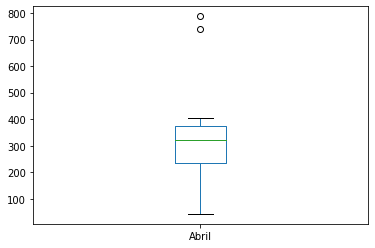

In [124]:
df["Abril"].plot.box()

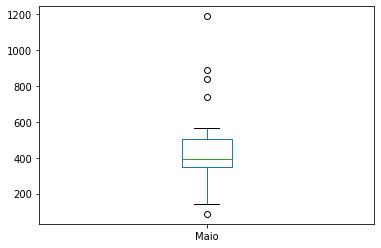

In [125]:
df["Maio"].plot.box()

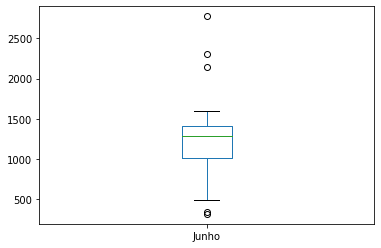

In [126]:
df["Junho"].plot.box()

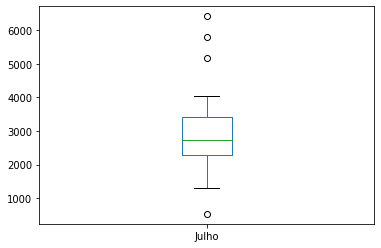

In [127]:
df["Julho"].plot.box()

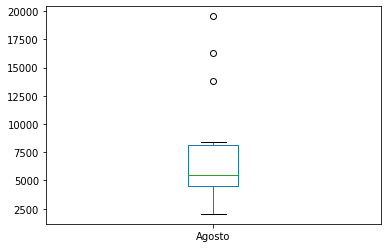

In [128]:
df["Agosto"].plot.box()

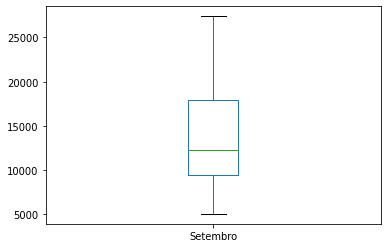

In [129]:
df["Setembro"].plot.box()

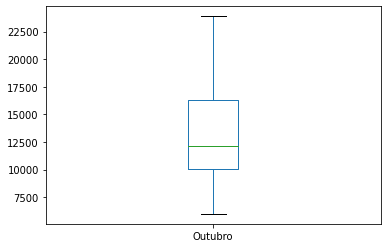

In [130]:
df["Outubro"].plot.box()

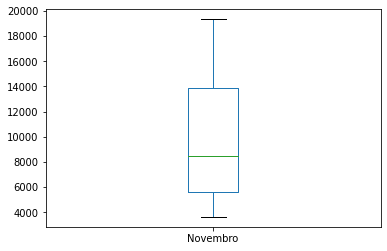

In [131]:
df["Novembro"].plot.box()

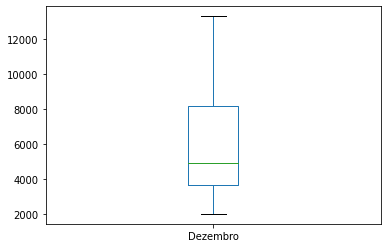

In [132]:
df["Dezembro"].plot.box()

##Gráfico do crescimento histórico Total

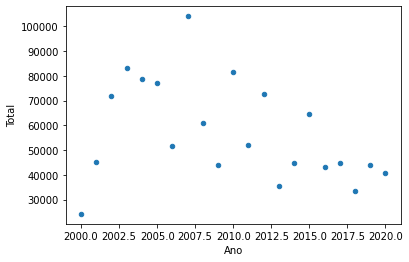

In [133]:
df.plot.scatter(x='Ano',y="Total")

##Detecção de outliers no total anual utilizando z-score robusto

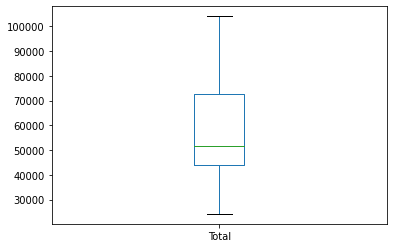

In [134]:
df["Total"].plot.box()

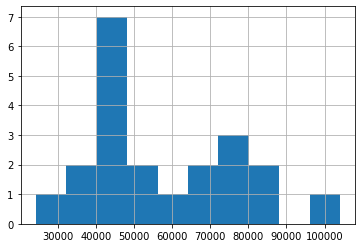

In [135]:
df["Total"].hist()

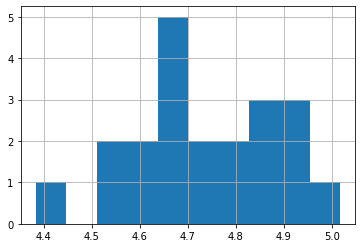

In [136]:
from numpy import log10, abs
df["Log_Total"] = log10(df["Total"])
df["Log_Total"].hist()

In [137]:
mad = abs(df["Total"] - df["Total"].median()).median()
mad

12984.0

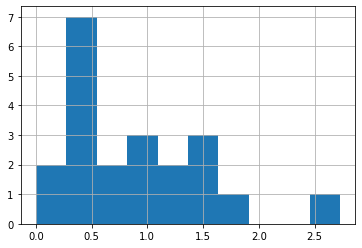

In [138]:
abs( (df["Total"]-df["Total"].median())*(0.6745) / mad ).hist()

In [139]:
df[abs( (df["Total"]-df["Total"].median())*(0.6745) / mad ) > 3.5]

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Log_Total


In [142]:
df.corr()

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Log_Total
Janeiro,1.000000,0.439879,0.602394,0.499692,0.276256,0.451359,0.478892,0.311540,0.450904,0.478955,0.506075,0.481313,0.605739,-0.046260,0.608209
Fevereiro,0.439879,1.000000,0.633951,0.393367,0.200359,0.158581,0.295248,0.140831,0.113721,0.192133,0.330928,0.276842,0.291055,0.054714,0.364675
Março,0.602394,0.633951,1.000000,0.653273,0.531269,0.551853,0.562463,0.427711,0.327787,-0.002842,0.087669,0.168851,0.338143,0.203979,0.360742
Abril,0.499692,0.393367,0.653273,1.000000,0.759459,0.678139,0.768176,0.502303,0.608621,0.432293,0.214032,0.309509,0.610472,0.035889,0.618815
Maio,0.276256,0.200359,0.531269,0.759459,1.000000,0.873819,0.896605,0.827199,0.692909,0.374209,0.133753,0.121614,0.651276,0.087837,0.627074
Junho,0.451359,0.158581,0.551853,0.678139,0.873819,1.000000,0.883367,0.836782,0.705598,0.319066,0.081627,0.085825,0.632337,0.290760,0.595871
Julho,0.478892,0.295248,0.562463,0.768176,0.896605,0.883367,1.000000,0.878787,0.730518,0.452283,0.167122,0.105879,0.712883,0.140392,0.696848
Agosto,0.311540,0.140831,0.427711,0.502303,0.827199,0.836782,0.878787,1.000000,0.711255,0.417346,0.078305,-0.027253,0.663707,0.072707,0.617725
Setembro,0.450904,0.113721,0.327787,0.608621,0.692909,0.705598,0.730518,0.711255,1.000000,0.702103,0.523663,0.445625,0.917484,-0.250807,0.888104
Outubro,0.478955,0.192133,-0.002842,0.432293,0.374209,0.319066,0.452283,0.417346,0.702103,1.000000,0.666832,0.538682,0.848078,-0.475824,0.816453


In [141]:
df.corr(method='kendall')

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Ano,Log_Total
Janeiro,1.000000,0.323810,0.539381,0.371429,0.243437,0.266667,0.219048,0.180952,0.219048,0.247619,0.352381,0.428571,0.390476,-0.114286,0.390476
Fevereiro,0.323810,1.000000,0.472555,0.266667,0.071599,0.028571,0.152381,0.114286,0.057143,0.104762,0.190476,0.266667,0.133333,0.047619,0.133333
Março,0.539381,0.472555,1.000000,0.424822,0.296651,0.348450,0.176611,0.195705,0.214798,-0.033413,0.109786,0.205251,0.243437,0.052506,0.243437
Abril,0.371429,0.266667,0.424822,1.000000,0.673033,0.628571,0.619048,0.466667,0.619048,0.380952,0.257143,0.314286,0.542857,0.000000,0.542857
Maio,0.243437,0.071599,0.296651,0.673033,1.000000,0.787592,0.615754,0.520288,0.424822,0.205251,0.081146,0.081146,0.329357,0.176611,0.329357
Junho,0.266667,0.028571,0.348450,0.628571,0.787592,1.000000,0.571429,0.533333,0.457143,0.142857,0.095238,0.095238,0.380952,0.180952,0.380952
Julho,0.219048,0.152381,0.176611,0.619048,0.615754,0.571429,1.000000,0.561905,0.428571,0.323810,0.104762,0.142857,0.428571,0.114286,0.428571
Agosto,0.180952,0.114286,0.195705,0.466667,0.520288,0.533333,0.561905,1.000000,0.390476,0.190476,0.028571,0.009524,0.333333,0.171429,0.333333
Setembro,0.219048,0.057143,0.214798,0.619048,0.424822,0.457143,0.428571,0.390476,1.000000,0.514286,0.352381,0.371429,0.733333,-0.152381,0.733333
Outubro,0.247619,0.104762,-0.033413,0.380952,0.205251,0.142857,0.323810,0.190476,0.514286,1.000000,0.476190,0.380952,0.590476,-0.295238,0.590476
